<a href="https://colab.research.google.com/github/ProGenei/T5Task2/blob/main/Weekly_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# sklearn

In [78]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Trainees - المتدربين/Week 2/2 - Foundations of Machine Learning/5- Weekly Project'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Trainees - المتدربين/Week 2/2 - Foundations of Machine Learning/5- Weekly Project


In [79]:
df = pd.read_csv('RTA_Dataset.csv')

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [80]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [81]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [82]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2608,17:18:00,Tuesday,18-30,Male,Elementary school,Employee,Below 1yr,Pick up upto 10Q,Owner,2-5yrs,...,Going straight,Pedestrian,Male,Over 51,3,Driver,Normal,Unknown or other,Changing lane to the right,Slight Injury


In [83]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [84]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [86]:
df[df['Defect_of_vehicle']=='No defect'].shape[0]

7777

In [87]:
df = df.drop(['Defect_of_vehicle'], axis=1)

In [88]:
df[df['Service_year_of_vehicle']=='Unknown'].shape[0]

2883

In [89]:
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].fillna('Unknown')

In [90]:
df['Work_of_casuality'] = df['Work_of_casuality'].fillna('Unknown')

In [91]:
df['Pedestrian_movement'].unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [92]:
df['Fitness_of_casuality'].unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind', 'NormalNormal'],
      dtype=object)

In [93]:
df[df['Fitness_of_casuality']=='Normal'].shape[0]

9608

In [94]:
df = df.drop(['Fitness_of_casuality'], axis=1)

In [95]:
df['Work_of_casuality'].unique()

array(['Unknown', 'Driver', 'Other', 'Unemployed', 'Employee',
       'Self-employed', 'Student'], dtype=object)

In [96]:
values = df['Work_of_casuality'].unique()
for value in values:
    df_count = df[df['Work_of_casuality']==value].shape[0]
    print(str(value), str(df_count))

Unknown 3217
Driver 5903
Other 463
Unemployed 33
Employee 553
Self-employed 2044
Student 103


In [97]:
df['Time']= pd.to_datetime(df['Time'])

<ipython-input-97-9d8a133adb20>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']= pd.to_datetime(df['Time'])


In [98]:
values = df['Day_of_week'].unique()
for value in values:
    df_count = df[df['Day_of_week']==value].shape[0]
    print(str(value), str(df_count))

Monday 1681
Sunday 1467
Friday 2041
Wednesday 1840
Saturday 1666
Thursday 1851
Tuesday 1770


In [99]:
values = df['Educational_level'].unique()
for value in values:
    df_count = df[df['Educational_level']==value].shape[0]
    print(str(value), str(df_count))

Above high school 362
Junior high school 7619
nan 0
Elementary school 2163
High school 1110
Unknown 100
Illiterate 45
Writing & reading 176


In [100]:
df['Educational_level'] = df['Educational_level'].fillna("Unknown")

In [101]:
values = df['Sex_of_driver'].unique()
for value in values:
    df_count = df[df['Sex_of_driver']==value].shape[0]
    print(str(value), str(df_count))

Male 11437
Female 701
Unknown 178


In [102]:
values = df['Work_of_casuality'].unique()
for value in values:
    df_count = df[df['Work_of_casuality']==value].shape[0]
    print(str(value), str(df_count))

Unknown 3217
Driver 5903
Other 463
Unemployed 33
Employee 553
Self-employed 2044
Student 103


In [103]:
values = df['Vehicle_driver_relation'].unique()
for value in values:
    df_count = df[df['Vehicle_driver_relation']==value].shape[0]
    print(str(value), str(df_count))

Employee 9627
Unknown 14
Owner 1973
nan 0
Other 123


In [104]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna('Employee')

In [105]:
df['Driving_experience'] = df['Driving_experience'].fillna('unknown')

In [106]:
values = df['Type_of_vehicle'].unique()
for value in values:
    df_count = df[df['Type_of_vehicle']==value].shape[0]
    print(str(value), str(df_count))

Automobile 3205
Public (> 45 seats) 404
Lorry (41?100Q) 2186
nan 0
Public (13?45 seats) 532
Lorry (11?40Q) 541
Long lorry 383
Public (12 seats) 711
Taxi 265
Pick up upto 10Q 811
Stationwagen 687
Ridden horse 76
Other 1208
Bajaj 29
Turbo 46
Motorcycle 177
Special vehicle 84
Bicycle 21


In [107]:
df['Driving_experience'] = df['Driving_experience'].fillna('Lorry (41?100Q)')

In [108]:
df = df.drop(['Vehicle_movement'], axis=1)

In [109]:
df['Types_of_Junction'] = df['Types_of_Junction'].fillna('Y Shape')

In [110]:
values = df['Types_of_Junction'].unique()
for value in values:
    df_count = df[df['Types_of_Junction']==value].shape[0]
    print(str(value), str(df_count))

No junction 3837
Y Shape 5430
Crossing 2177
O Shape 164
Other 445
Unknown 191
T Shape 60
X Shape 12


In [111]:
values = df['Type_of_collision'].unique()
for value in values:
    df_count = df[df['Type_of_collision']==value].shape[0]
    print(str(value), str(df_count))

Collision with roadside-parked vehicles 54
Vehicle with vehicle collision 8774
Collision with roadside objects 1786
Collision with animals 171
Other 26
Rollover 397
Fall from vehicles 34
Collision with pedestrians 896
With Train 9
Unknown 14
nan 0


In [112]:
df['Type_of_collision'] = df['Type_of_collision'].str.replace('Collision with ', '')

In [113]:
values = df['Type_of_collision'].unique()
for value in values:
    df_count = df[df['Type_of_collision']==value].shape[0]
    print(str(value), str(df_count))

roadside-parked vehicles 54
Vehicle with vehicle collision 8774
roadside objects 1786
animals 171
Other 26
Rollover 397
Fall from vehicles 34
pedestrians 896
With Train 9
Unknown 14
nan 0


In [114]:
df['Type_of_collision'] = df['Type_of_collision'].str.replace(' collision', '')

In [115]:
values = df['Sex_of_casualty'].unique()
for value in values:
    df_count = df[df['Sex_of_casualty']==value].shape[0]
    print(str(value), str(df_count))

na 4443
Male 5253
Female 2620


In [116]:
df['Sex_of_casualty'] = df['Sex_of_casualty'].str.replace('na', 'Male')

In [117]:
values = df['Sex_of_casualty'].unique()
for value in values:
    df_count = df[df['Sex_of_casualty']==value].shape[0]
    print(str(value), str(df_count))

Male 9696
Female 2620


In [118]:
values = df['Age_band_of_casualty'].unique()
for value in values:
    df_count = df[df['Age_band_of_casualty']==value].shape[0]
    print(str(value), str(df_count))

na 4443
31-50 2455
18-30 3145
Under 18 1035
Over 51 994
5 244


In [119]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].str.replace('Over 31','Over 50')

In [120]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].str.replace('31-31-500','31-50')

In [121]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].str.replace('5','31-50')

In [122]:
df = df.drop(['Casualty_class'], axis=1)

In [123]:
df = df.drop(['Casualty_severity'], axis=1)

In [124]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace('na', df['Type_of_vehicle'].mode()[0])

In [125]:
values = df['Type_of_vehicle'].unique()
for value in values:
    df_count = df[df['Type_of_vehicle']==value].shape[0]
    print(str(value), str(df_count))

Automobile 3205
Public (> 45 seats) 404
Lorry (41?100Q) 2186
nan 0
Public (13?45 seats) 532
Lorry (11?40Q) 541
Long lorry 383
Public (12 seats) 711
Taxi 265
Pick up upto 10Q 811
Stationwagen 687
Ridden horse 76
Other 1208
Bajaj 29
Turbo 46
Motorcycle 177
Special vehicle 84
Bicycle 21


In [126]:
df.dropna(subset=['Type_of_collision'], inplace=True)

In [127]:
df.dropna(subset=['Road_surface_type'], inplace=True)
df.dropna(subset=['Owner_of_vehicle'], inplace=True)
df.dropna(subset=['Road_allignment'], inplace=True)
df.dropna(subset=['Lanes_or_Medians'], inplace=True)
df.dropna(subset=['Type_of_vehicle'], inplace=True)
df.dropna(subset=['Area_accident_occured'], inplace=True)

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [128]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Day_of_week']= label_encoder.fit_transform(df['Day_of_week'])

df['Day_of_week'].unique()

array([1, 3, 0, 2, 4, 5, 6])

In [129]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age_band_of_driver']= label_encoder.fit_transform(df['Age_band_of_driver'])

df['Age_band_of_driver'].unique()

array([1, 0, 3, 2, 4])

In [130]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Educational_level']= label_encoder.fit_transform(df['Educational_level'])

df['Educational_level'].unique()

array([4, 0, 1, 5, 2, 3, 6])

In [131]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Type_of_vehicle']= label_encoder.fit_transform(df['Type_of_vehicle'])

df['Type_of_vehicle'].unique()

array([11,  0,  5, 10,  4,  3,  9, 15,  8, 14, 12,  7,  1, 16,  6, 13,  2])

In [132]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Accident_severity']= label_encoder.fit_transform(df['Accident_severity'])

df['Accident_severity'].unique()

array([2, 1, 0])

In [133]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Cause_of_accident']= label_encoder.fit_transform(df['Cause_of_accident'])

df['Cause_of_accident'].unique()

array([16,  1, 12,  9,  0, 11, 10,  7, 14, 13, 15,  3,  2,  4, 19, 17, 18,
        5,  6,  8])

In [134]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Sex_of_driver']= label_encoder.fit_transform(df['Sex_of_driver'])

df['Sex_of_driver'].unique()

array([1, 0, 2])

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

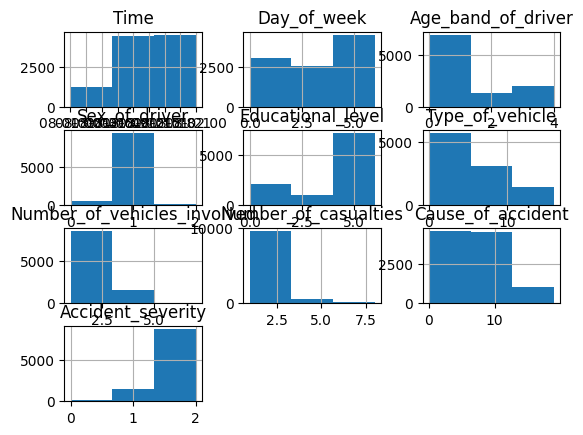

In [219]:
df_r = pd.DataFrame(df)
hist = df_r.hist(bins=3)

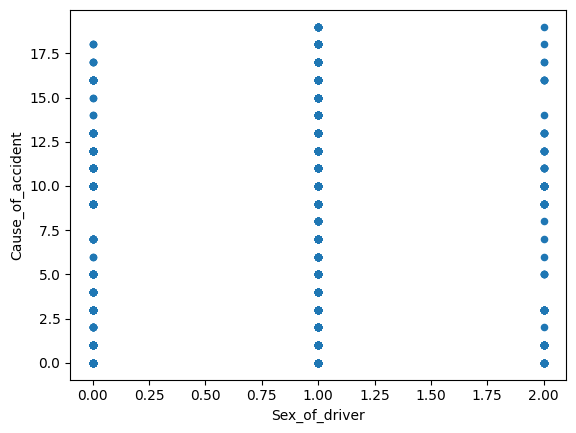

In [217]:
ax2 = df.plot.scatter(x='Sex_of_driver',y='Cause_of_accident')

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [135]:
from sklearn.model_selection import train_test_split

X = df.drop(['Accident_severity'], axis=1)
y = df['Accident_severity']
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [72]:
df['Accident_severity'].unique()

array([2, 1, 0])

In [138]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [137]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [216]:
from sklearn.model_selection import train_test_split

#, 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Cause_of_accident', 'Type_of_vehicle']

X = df['Day_of_week']
y = df['Accident_severity']

#X = np.array([df['Day_of_week']])
#y = np.array([df['Accident_severity']])

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = np.array([[0], [2]])
y_train = np.array([[0], [2]])
X_test = np.array([[0], [2]])
y_test = np.array([[0], [2]])

X_train_s = scaler.fit_transform(X_train)
y_train_s = scaler.fit(y_train)

In [208]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV

regr = LogisticRegressionCV()
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=2.

#### Decision Tree Classifier

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


clf = DecisionTreeClassifier(random_state=42)
clf = np.array([[0], [2]])

cross_val_score(clf, X, y, cv=10)

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)
recall_score(y_test, y_pred,)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

InvalidParameterError: The 'estimator' parameter of check_scoring must be an object implementing 'fit'. Got array([[0],
       [2]]) instead.

#### Support Vector Machine (SVM)

In [210]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC())
classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)
recall_score(y_test, y_pred,)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [212]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train, y_train)
clf.predict

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)
recall_score(y_test, y_pred,)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

#### K-Neighbors Classifier

In [214]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
print(neigh.predict(X_test))

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)
recall_score(y_test, y_pred,)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

[0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [206]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)
recall_score(y_test, y_pred,)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

- There are errors in the classification because they say its regression not classification
- the feature enginnering got well with the spacing and naming and filling nulls
- the target got 3 attributes